In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data =pd.read_csv('D:\ML\Practice_Codes_ML_PlayList_V2\Datasets\creditcard.csv\creditcard.csv')

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
X=data.iloc[:,:-1]

In [5]:
y=data.iloc[:,-1]

In [6]:
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [7]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [8]:
data.isnull().values.any()

False

In [9]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [10]:
count_classes = data['Class'].value_counts()

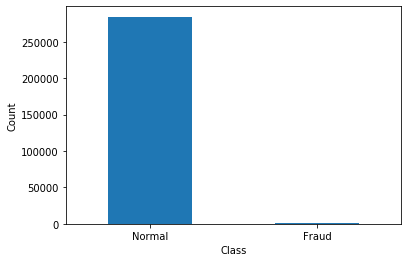

In [16]:
count_classes.plot(kind='bar',rot=0)
plt.xticks(range(2),['Normal','Fraud'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [26]:
normal = data[data['Class']== 0]
fraud =  data[data['Class']== 1]

In [28]:
normal.shape, fraud.shape

((284315, 31), (492, 31))

In [30]:
from imblearn.over_sampling import RandomOverSampler

In [31]:
os = RandomOverSampler(ratio=0.5)

In [32]:
X_res , y_res = os.fit_sample(X,y)

In [33]:
X_res.shape, y_res.shape

((426472, 30), (426472,))

### So what happens is (ratio -0.5) of earlier dataset - 284315/2 = 142,000(in total) has been added to fraud so that it becomes half of normal , so now normal - 284,000 and fraud is 142,000, therefore total = 284K+142K = 426K whihc is the result

In [34]:
from collections import Counter

In [36]:
print('Original dataset {}'.format(Counter(y)))
print('Original dataset {}'.format(Counter(y_res)))

Original dataset Counter({0: 284315, 1: 492})
Original dataset Counter({0: 284315, 1: 142157})


## SMOTETomek

In [38]:
from imblearn.combine import SMOTETomek

In [40]:
smk = SMOTETomek(random_state=42)

In [41]:
X_res, y_res = smk.fit_sample(X,y)

In [42]:
X_res.shape, y_res.shape

((567562, 30), (567562,))